../crabs_dataset/image_matching/test/id_00000005_02/02_4_full.jpg


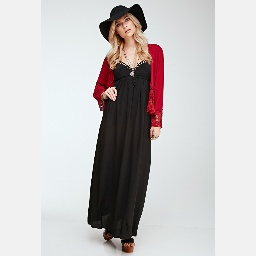

In [2]:
import os
from PIL import Image
from torchvision.transforms import transforms
from data_aug.gaussian_blur import GaussianBlur
s=0.2
size = 224
color_jitter = transforms.ColorJitter(0.8 * s, 0.8 * s, 0.8 * s, 0.2 * s)
data_transforms = transforms.Compose([transforms.RandomResizedCrop(size=size, scale=(0.5,1.2)),
                                      transforms.RandomAffine(5, translate=(0.2,0.2), shear=10),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.RandomApply([color_jitter], p=0.8),
                                      GaussianBlur(kernel_size=int(0.1 * size))]
                                    )

# negative_transforms1 = transforms.Compose([transforms.ColorJitter(saturation = [2.0,3.0], hue=(-0.5,-0.4)),
#                                       # transforms.RandomResizedCrop(size=size, scale=(0.5,1.2)),
#                                       # transforms.RandomAffine(5, translate=(0.2,0.2), shear=10),
#                                       # transforms.RandomHorizontalFlip(),
#                                       # GaussianBlur(kernel_size=int(0.1 * size))
#                                       ]
#                                     )
# negative_transforms2 = transforms.Compose([transforms.ColorJitter(saturation = [2.0,3.0], hue=(0.4,0.5))
#                                       ]
#                                     )

matching_dataset = '../crabs_dataset/image_matching/test'
idlist = sorted(os.listdir(matching_dataset))
idname = idlist[0]
idpath = os.path.join(matching_dataset, idname)
imgname = os.listdir(idpath)[0]

imgpath = os.path.join(idpath, imgname)

img = Image.open(imgpath).convert('RGB')

print(imgpath)
img

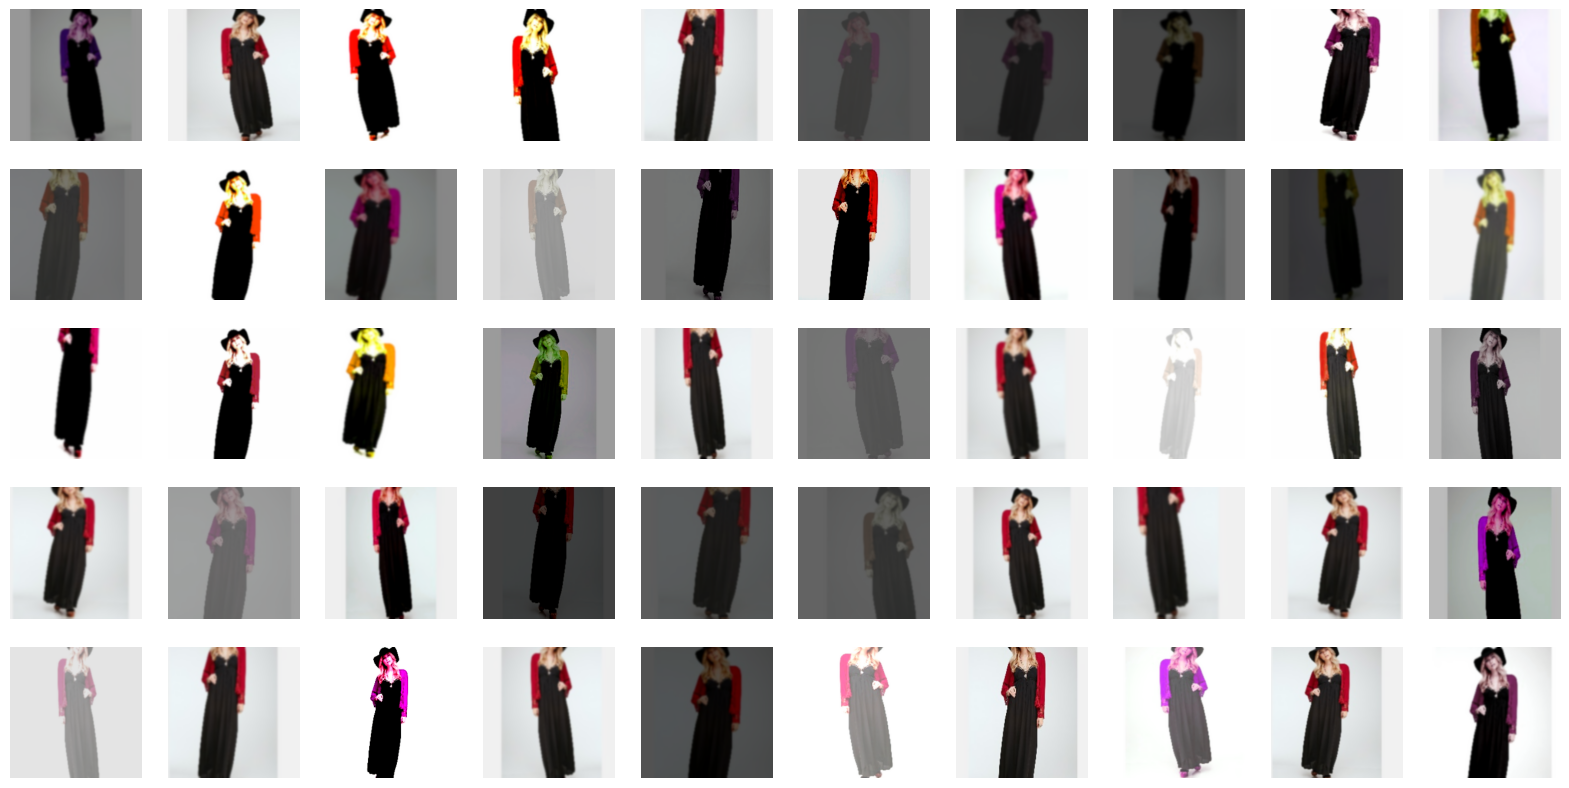

In [3]:
import matplotlib.pyplot as plt

transformed_img = data_transforms(img)

fig, axes = plt.subplots(5, 10, figsize=(20, 10))
for axe in axes:
    for ax in axe:
        transformed_img = data_transforms(img)
        # transformed_img = negative_transforms2(img)

        ax.imshow(transformed_img)
        ax.axis('off')  # 축 끄기

plt.show()


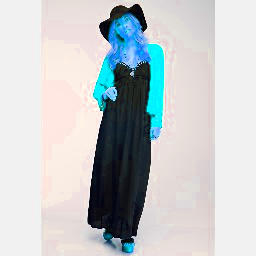

In [121]:
transformed_img = negative_transforms1(img)
transformed_img